In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
pd.options.display.max_colwidth = 1000
data = pd.read_csv('YouTube.csv')
data = data.iloc[:, 1:]     # Remove extra un-named column
data.head(5)

,channel_id,video_title,channel_name,video_ids,Title,Published_date,description,tags,class
0,UExxbnNsUkZlSDJVcGNyeXdmLXUyZXRqZHh4a0w4bmw3RS41NkI0NEY2RDEwNTU3Q0M2,KNN (K Nearest Neighbors) in Python - Machine Learning From Scratch 01 - Python Tutorial,Patrick Loeber,ngLyX54e1LU,KNN (K Nearest Neighbors) in Python - Machine Learning From Scratch 01 - Python Tutorial,2019-09-03T15:00:07Z,"Get my Free NumPy Handbook:\nhttps://www.python-engineer.com/numpybook\n\nIn this Machine Learning from Scratch Tutorial, we are going to implement the K Nearest Neighbors (KNN) algorithm, using only built-in Python modules and numpy. We will also learn about the concept and the math behind this popular ML algorithm.\n\n~~~~~~~~~~~~~~ GREAT PLUGINS FOR YOUR CODE EDITOR ~~~~~~~~~~~~~~\n✅ Write cleaner code with Sourcery: https://sourcery.ai/?utm_source=youtube&utm_campaign=pythonengineer *\n\n📓 Notebooks available on Patreon:\nhttps://www.patreon.com/patrickloeber\n\n⭐ Join Our Discord : https://discord.gg/FHMg9tKFSN\n\nIf you enjoyed this video, please subscribe to the channel!\n\nThe code can be found here:\nhttps://github.com/patrickloeber/MLfromscratch\n\nYou can find me here:\nWebsite: https://www.python-engineer.com\nTwitter: https://twitter.com/patloeber\nGitHub: https://github.com/patrickloeber\n\n#Python #MachineLearning\n\n-------------------------------------------------...","['Python', 'Machine Learning', 'ML', 'numpy', 'KNN', 'Tutorial']",machine learning
1,UExxbnNsUkZlSDJVcGNyeXdmLXUyZXRqZHh4a0w4bmw3RS4yODlGNEE0NkRGMEEzMEQy,Linear Regression in Python - Machine Learning From Scratch 02 - Python Tutorial,Patrick Loeber,4swNt7PiamQ,Linear Regression in Python - Machine Learning From Scratch 02 - Python Tutorial,2019-09-11T13:25:56Z,"Get my Free NumPy Handbook:\nhttps://www.python-engineer.com/numpybook\n\nIn this Machine Learning from Scratch Tutorial, we are going to implement the Linear Regression algorithm, using only built-in Python modules and numpy. We will also learn about the concept and the math behind this popular ML algorithm.\n\n~~~~~~~~~~~~~~ GREAT PLUGINS FOR YOUR CODE EDITOR ~~~~~~~~~~~~~~\n✅ Write cleaner code with Sourcery: https://sourcery.ai/?utm_source=youtube&utm_campaign=pythonengineer *\n\n📓 Notebooks available on Patreon:\nhttps://www.patreon.com/patrickloeber\n\n⭐ Join Our Discord : https://discord.gg/FHMg9tKFSN\n\nIf you enjoyed this video, please subscribe to the channel!\n\nThe code can be found here:\nhttps://github.com/patrickloeber/MLfromscratch\n\nFurther readings:\nhttps://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html\nhttps://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html\n\n\nYou can find me here:\nWebsite: https://www.python-engineer.com\nTwitt...","['Python', 'Machine Learning', 'Regression', 'numpy', 'Tutorial', 'Gradient descent']",machine learning
2,UExxbnNsUkZlSDJVcGNyeXdmLXUyZXRqZHh4a0w4bmw3RS4wMTcyMDhGQUE4NTIzM0Y5,Logistic Regression in Python - Machine Learning From Scratch 03 - Python Tutorial,Patrick Loeber,JDU3AzH3WKg,Logistic Regression in Python - Machine Learning From Scratch 03 - Python Tutorial,2019-09-15T16:00:02Z,"Get my Free NumPy Handbook:\nhttps://www.python-engineer.com/numpybook\n\nIn this Machine Learning from Scratch Tutorial, we are going to implement the Logistic Regression algorithm, using only built-in Python modules and numpy. We will also learn about the concept and the math behind this popular ML algorithm.\n\n~~~~~~~~~~~~~~ GREAT PLUGINS FOR YOUR CODE EDITOR ~~~~~~~~~~~~~~\n✅ Write cleaner code with Sourcery: https://sourcery.ai/?utm_source=youtube&utm_campaign=pythonengineer *\n\n📓 Notebooks available on Patreon:\nhttps://www.patreon.com/patrickloeber\n\n⭐ Join Our Discord : https://discord.gg/FHMg9tKFSN\n\nIf you enjoyed this video, please subscribe to the channel!\n\nThe code can be found here:\nhttps://github.com/patrickloeber/MLfromscratch\n\nFurther readings:\nhttps://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html\

In [3]:
data = data.drop(['channel_id','channel_name','Title','video_ids','Published_date'], axis=1)
data.head(5)

,video_title,description,tags,class
0,KNN (K Nearest Neighbors) in Python - Machine Learning From Scratch 01 - Python Tutorial,"Get my Free NumPy Handbook:\nhttps://www.python-engineer.com/numpybook\n\nIn this Machine Learning from Scratch Tutorial, we are going to implement the K Nearest Neighbors (KNN) algorithm, using only built-in Python modules and numpy. We will also learn about the concept and the math behind this popular ML algorithm.\n\n~~~~~~~~~~~~~~ GREAT PLUGINS FOR YOUR CODE EDITOR ~~~~~~~~~~~~~~\n✅ Write cleaner code with Sourcery: https://sourcery.ai/?utm_source=youtube&utm_campaign=pythonengineer *\n\n📓 Notebooks available on Patreon:\nhttps://www.patreon.com/patrickloeber\n\n⭐ Join Our Discord : https://discord.gg/FHMg9tKFSN\n\nIf you enjoyed this video, please subscribe to the channel!\n\nThe code can be found here:\nhttps://github.com/patrickloeber/MLfromscratch\n\nYou can find me here:\nWebsite: https://www.python-engineer.com\nTwitter: https://twitter.com/patloeber\nGitHub: https://github.com/patrickloeber\n\n#Python #MachineLearning\n\n-------------------------------------------------...","['Python', 'Machine Learning', 'ML', 'numpy', 'KNN', 'Tutorial']",machine learning
1,Linear Regression in Python - Machine Learning From Scratch 02 - Python Tutorial,"Get my Free NumPy Handbook:\nhttps://www.python-engineer.com/numpybook\n\nIn this Machine Learning from Scratch Tutorial, we are going to implement the Linear Regression algorithm, using only built-in Python modules and numpy. We will also learn about the concept and the math behind this popular ML algorithm.\n\n~~~~~~~~~~~~~~ GREAT PLUGINS FOR YOUR CODE EDITOR ~~~~~~~~~~~~~~\n✅ Write cleaner code with Sourcery: https://sourcery.ai/?utm_source=youtube&utm_campaign=pythonengineer *\n\n📓 Notebooks available on Patreon:\nhttps://www.patreon.com/patrickloeber\n\n⭐ Join Our Discord : https://discord.gg/FHMg9tKFSN\n\nIf you enjoyed this video, please subscribe to the channel!\n\nThe code can be found here:\nhttps://github.com/patrickloeber/MLfromscratch\n\nFurther readings:\nhttps://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html\nhttps://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html\n\n\nYou can find me here:\nWebsite: https://www.python-engineer.com\nTwitt...","['Python', 'Machine Learning', 'Regression', 'numpy', 'Tutorial', 'Gradient descent']",machine learning
2,Logistic Regression in Python - Machine Learning From Scratch 03 - Python Tutorial,"Get my Free NumPy Handbook:\nhttps://www.python-engineer.com/numpybook\n\nIn this Machine Learning from Scratch Tutorial, we are going to implement the Logistic Regression algorithm, using only built-in Python modules and numpy. We will also learn about the concept and the math behind this popular ML algorithm.\n\n~~~~~~~~~~~~~~ GREAT PLUGINS FOR YOUR CODE EDITOR ~~~~~~~~~~~~~~\n✅ Write cleaner code with Sourcery: https://sourcery.ai/?utm_source=youtube&utm_campaign=pythonengineer *\n\n📓 Notebooks available on Patreon:\nhttps://www.patreon.com/patrickloeber\n\n⭐ Join Our Discord : https://discord.gg/FHMg9tKFSN\n\nIf you enjoyed this video, please subscribe to the channel!\n\nThe code can be found here:\nhttps://github.com/patrickloeber/MLfromscratch\n\nFurther readings:\nhttps://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html\nhttps://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc\n\n\nYou can find me here:\nWebsite: https://www.python-en...","['Python', 'Machine Learning', 'numpy', 'Tutorial', 'Logistic Regression']",machine learning
3,Linear and Logistic Regression in 60 lines of Python - Machine Learning From Scratch 04,"Get my Free NumPy Handbook:\nhttps://www.python-engineer.com/numpybook\n\nIn this Machine Learning from Scratch Tutorial, we are going to refactor the code from the previous two videos. We will implement Linear and Logistic Regression in only 60 lines of Python, with the help of a Base Regression class.\n\n~~~~~~~~~~~~~~ GREAT

In [4]:
#turning into lowercase

data['video_title'] = data['video_title'].apply(lambda x: x.lower())
data['description'] = data['description'].apply(lambda x: x.lower() if isinstance(x, str) else x)
data['tags'] = data['tags'].apply(lambda x: x.lower() if isinstance(x, str) else x)

#removing numeric values

data['video_title'] = data['video_title'].map(lambda x: re.sub(r'\d+', '', x))
data['description'] = data['description'].astype(str)
data['description'] = data['description'].apply(lambda x: re.sub(r'\d+', '', x))

data['tags'] = data['tags'].astype(str)
data['tags'] = data['tags'].apply(lambda x: re.sub(r'\d+', '', x))

#remove punctuation
data['video_title']  = data['video_title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
data['description']  = data['description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
data['tags']  = data['tags'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

#remove white spaces
data['video_title'] = data['video_title'].map(lambda x: x.strip())
data['description'] = data['description'].map(lambda x: x.strip())
data['tags'] = data['tags'].map(lambda x: x.strip())


data.head(5)

,video_title,description,tags,class
0,knn k nearest neighbors in python machine learning from scratch python tutorial,get my free numpy handbook\nhttpswwwpythonengineercomnumpybook\n\nin this machine learning from scratch tutorial we are going to implement the k nearest neighbors knn algorithm using only builtin python modules and numpy we will also learn about the concept and the math behind this popular ml algorithm\n\n great plugins for your code editor \n✅ write cleaner code with sourcery httpssourceryaiutmsourceyoutubeutmcampaignpythonengineer \n\n📓 notebooks available on patreon\nhttpswwwpatreoncompatrickloeber\n\n⭐ join our discord httpsdiscordggfhmgtkfsn\n\nif you enjoyed this video please subscribe to the channel\n\nthe code can be found here\nhttpsgithubcompatrickloebermlfromscratch\n\nyou can find me here\nwebsite httpswwwpythonengineercom\ntwitter httpstwittercompatloeber\ngithub httpsgithubcompatrickloeber\n\npython machinelearning\n\n\n this is a sponsored link by clicking on it you will not have any additional costs instead you will support me and my project thank you so much for ...,python machine learning ml numpy knn tutorial,machine learning
1,linear regression in python machine learning from scratch python tutorial,get my free numpy handbook\nhttpswwwpythonengineercomnumpybook\n\nin this machine learning from scratch tutorial we are going to implement the linear regression algorithm using only builtin python modules and numpy we will also learn about the concept and the math behind this popular ml algorithm\n\n great plugins for your code editor \n✅ write cleaner code with sourcery httpssourceryaiutmsourceyoutubeutmcampaignpythonengineer \n\n📓 notebooks available on patreon\nhttpswwwpatreoncompatrickloeber\n\n⭐ join our discord httpsdiscordggfhmgtkfsn\n\nif you enjoyed this video please subscribe to the channel\n\nthe code can be found here\nhttpsgithubcompatrickloebermlfromscratch\n\nfurther readings\nhttpsmlcheatsheetreadthedocsioenlatestlinearregressionhtml\nhttpsmlcheatsheetreadthedocsioenlatestgradientdescenthtml\n\n\nyou can find me here\nwebsite httpswwwpythonengineercom\ntwitter httpstwittercompatloeber\ngithub httpsgithubcompatrickloeber\n\npython machinelearning\n\n\n this is a sp...,python machine learning regression numpy tutorial gradient descent,machine learning
2,logistic regression in python machine learning from scratch python tutorial,get my free numpy handbook\nhttpswwwpythonengineercomnumpybook\n\nin this machine learning from scratch tutorial we are going to implement the logistic regression algorithm using only builtin python modules and numpy we will also learn about the concept and the math behind this popular ml algorithm\n\n great plugins for your code editor \n✅ write cleaner code with sourcery httpssourceryaiutmsourceyoutubeutmcampaignpythonengineer \n\n📓 notebooks available on patreon\nhttpswwwpatreoncompatrickloeber\n\n⭐ join our discord httpsdiscordggfhmgtkfsn\n\nif you enjoyed this video please subscribe to the channel\n\nthe code can be found here\nhttpsgithubcompatrickloebermlfromscratch\n\nfurther readings\nhttpsmlcheatsheetreadthedocsioenlatestlogisticregressionhtml\nhttpstowardsdatasciencecomlogisticregressiondetailedoverviewcdabc\n\n\nyou can find me here\nwebsite httpswwwpythonengineercom\ntwitter httpstwittercompatloeber\ngithub httpsgithubcompatrickloeber\n\npython machinelearning\n\n\n ...,python machine learning numpy tutorial logistic regression,machine learning
3,linear and logistic regression in lines of python machine learning from scratch,get my free numpy handbook\nhttpswwwpythonengineercomnumpybook\n\nin this machine learning from scratch tutorial we are going to refactor the code from the previous two videos we will implement linear and logistic regression in only lines of python with the help of a base regression class\n\n great plugins for your code editor \n✅ write cleaner code with sourcery httpssourceryaiutmsourceyoutubeutmcampaignpythonengineer \n\n📓 

In [5]:
# Tokenize into words

def tokenize_text(video_title):
    return nltk.word_tokenize(video_title)

data['video_title'] = data['video_title'].apply(tokenize_text)

def tokenize_text1(description):
    return nltk.word_tokenize(description)

data['description'] = data['description'].apply(tokenize_text1)

def tokenize_text2(tags):
    return nltk.word_tokenize(tags)

data['tags'] = data['tags'].apply(tokenize_text2)

In [6]:
#remove non-alphabetics
data['video_title'] = data['video_title'].map(lambda x: [word for word in x if word.isalpha()])
data['description'] = data['description'].map(lambda x: [word for word in x if word.isalpha()])
data['tags'] = data['tags'].map(lambda x: [word for word in x if word.isalpha()])

#reove stop-wprds
stop_words = set(stopwords.words('english'))
data['video_title'] = data['video_title'].map(lambda x: [w for w in x if not w in stop_words])
data['description'] = data['description'].map(lambda x: [w for w in x if not w in stop_words])
data['tags'] = data['tags'].map(lambda x: [w for w in x if not w in stop_words])

In [7]:
def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
            lemma = lemmatizer.lemmatize(word)
            lemmas.append(lemma)
    return lemmas

data['video_title'] = data['video_title'].apply(lambda x: lemmatize_words(x))
data['video_title'] = data['video_title'].map(lambda x: ' '.join(x))

def lemmatize_words1(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
            lemma = lemmatizer.lemmatize(word)
            lemmas.append(lemma)
    return lemmas

data['description'] = data['description'].apply(lambda x: lemmatize_words1(x))
data['description'] = data['description'].map(lambda x: ' '.join(x))

def lemmatize_words2(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
            lemma = lemmatizer.lemmatize(word)
            lemmas.append(lemma)
    return lemmas

data['tags'] = data['tags'].apply(lambda x: lemmatize_words2(x))
data['tags'] = data['tags'].map(lambda x: ' '.join(x))


In [8]:
data = data.replace(['', ' ', 'NaN', 'nan'], pd.NaT)
data = data.dropna(how='any')
data.head(5)

,video_title,description,tags,class
0,knn k nearest neighbor python machine learning scratch python tutorial,get free numpy handbook httpswwwpythonengineercomnumpybook machine learning scratch tutorial going implement k nearest neighbor knn algorithm using builtin python module numpy also learn concept math behind popular ml algorithm great plugins code editor write cleaner code sourcery httpssourceryaiutmsourceyoutubeutmcampaignpythonengineer notebook available patreon httpswwwpatreoncompatrickloeber join discord httpsdiscordggfhmgtkfsn enjoyed video please subscribe channel code found httpsgithubcompatrickloebermlfromscratch find website httpswwwpythonengineercom twitter httpstwittercompatloeber github httpsgithubcompatrickloeber python machinelearning sponsored link clicking additional cost instead support project thank much support,python machine learning ml numpy knn tutorial,machine learning
1,linear regression python machine learning scratch python tutorial,get free numpy handbook httpswwwpythonengineercomnumpybook machine learning scratch tutorial going implement linear regression algorithm using builtin python module numpy also learn concept math behind popular ml algorithm great plugins code editor write cleaner code sourcery httpssourceryaiutmsourceyoutubeutmcampaignpythonengineer notebook available patreon httpswwwpatreoncompatrickloeber join discord httpsdiscordggfhmgtkfsn enjoyed video please subscribe channel code found httpsgithubcompatrickloebermlfromscratch reading httpsmlcheatsheetreadthedocsioenlatestlinearregressionhtml httpsmlcheatsheetreadthedocsioenlatestgradientdescenthtml find website httpswwwpythonengineercom twitter httpstwittercompatloeber github httpsgithubcompatrickloeber python machinelearning sponsored link clicking additional cost instead support project thank much support,python machine learning regression numpy tutorial gradient descent,machine learning
2,logistic regression python machine learning scratch python tutorial,get free numpy handbook httpswwwpythonengineercomnumpybook machine learning scratch tutorial going implement logistic regression algorithm using builtin python module numpy also learn concept math behind popular ml algorithm great plugins code editor write cleaner code sourcery httpssourceryaiutmsourceyoutubeutmcampaignpythonengineer notebook available patreon httpswwwpatreoncompatrickloeber join discord httpsdiscordggfhmgtkfsn enjoyed video please subscribe channel code found httpsgithubcompatrickloebermlfromscratch reading httpsmlcheatsheetreadthedocsioenlatestlogisticregressionhtml httpstowardsdatasciencecomlogisticregressiondetailedoverviewcdabc find website httpswwwpythonengineercom twitter httpstwittercompatloeber github httpsgithubcompatrickloeber python machinelearning sponsored link clicking additional cost instead support project thank much support,python machine learning numpy tutorial logistic regression,machine learning
3,linear logistic regression line python machine learning scratch,get free numpy handbook httpswwwpythonengineercomnumpybook machine learning scratch tutorial going refactor code previous two video implement linear logistic regression line python help base regression class great plugins code editor write cleaner code sourcery httpssourceryaiutmsourceyoutubeutmcampaignpythonengineer notebook available patreon httpswwwpatreoncompatrickloeber join discord httpsdiscordggfhmgtkfsn enjoyed video please subscribe channel code found httpsgithubcompatrickloebermlfromscratch find website httpswwwpythonengineercom twitter httpstwittercompatloeber github httpsgithubcompatrickloeber python machinelearning sponsored link clicking additional cost instead support project thank much support,python machine learning numpy linear regression logistic regression tutorial,machine learning
4,naive bayes python machine learning scratch python tutorial,get free numpy handbook httpswwwpythonengineercomnumpybook machine learning scratch tutorial going implement naive bayes

In [9]:
#label encoding

from sklearn.preprocessing import LabelEncoder
import pandas as pd
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import nltk


stop_words = nltk.corpus.stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words)
title_tfidf = vectorizer.fit_transform(data['video_title'])
desc_tfidf = vectorizer.fit_transform(data['description'])
tags_tfidf = vectorizer.fit_transform(data['tags'])
             
labels = data['class']

df_tfidf = hstack([title_tfidf, desc_tfidf, tags_tfidf ])
print(df_tfidf.shape)

(882, 9633)


In [11]:
#from sklearn.naive_bayes import MultinomialNB
#clf = MultinomialNB()
#clf.fit(df_tfidf, labels)

In [12]:
import numpy as np
feature_names = np.array(vectorizer.get_feature_names_out())

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_tfidf, labels, test_size=0.2, random_state=42)


In [59]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)



MultinomialNB()

In [61]:
from sklearn.metrics import accuracy_score

y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9887005649717514


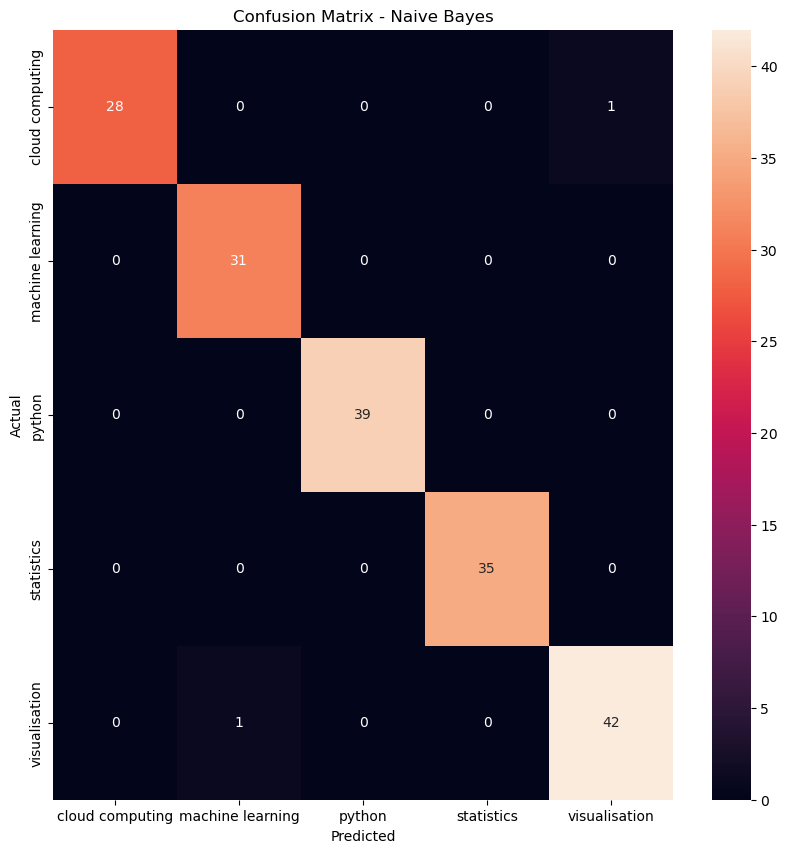

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        35
           4       0.98      0.98      0.98        43

    accuracy                           0.99       177
   macro avg       0.99      0.99      0.99       177
weighted avg       0.99      0.99      0.99       177



In [62]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# Make predictions on the test set
y_pred = nb.predict(X_test)
y_probas = nb.predict_proba(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

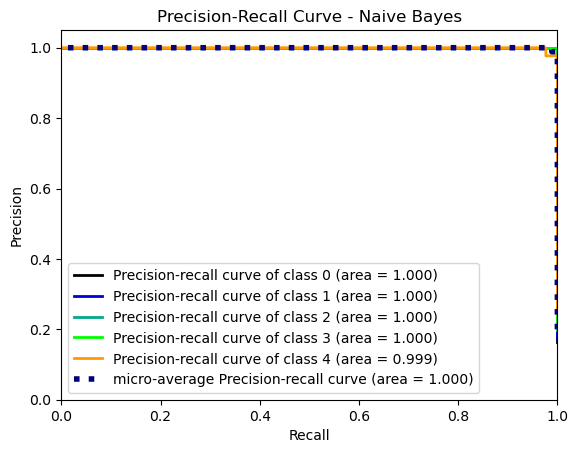

In [63]:
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - Naive Bayes')
plt.show()

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb, df_tfidf, labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.05)


In [65]:
from sklearn.feature_selection import SelectKBest, chi2

# Perform feature selection using chi-squared test
k = 1000  # Number of features to select
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train and evaluate the model on the selected features
nb= MultinomialNB()
nb.fit(X_train_selected, y_train)
accuracy = nb.score(X_test_selected, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9943502824858758


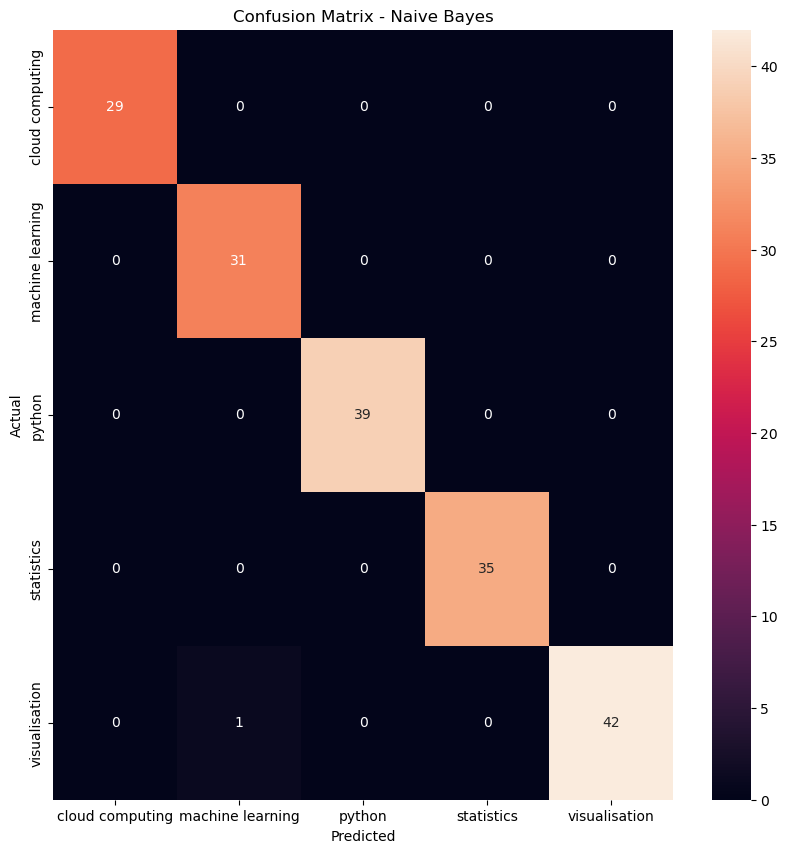

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        35
           4       1.00      0.98      0.99        43

    accuracy                           0.99       177
   macro avg       0.99      1.00      0.99       177
weighted avg       0.99      0.99      0.99       177



In [66]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# Make predictions on the test set
y_pred = nb.predict(X_test_selected)
y_probas = nb.predict_proba(X_test_selected)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)



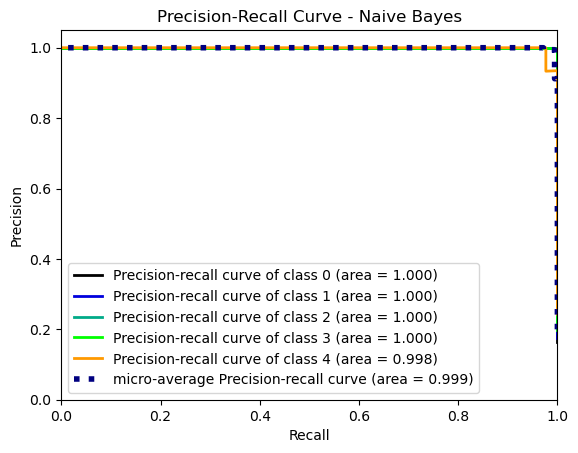

In [67]:
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - Naive Bayes')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, labels, test_size=0.2, random_state=49)

from sklearn.svm import SVC

svm = SVC(kernel='linear',probability=True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [23]:
y_pred = svm.predict(X_test)
y_probas = svm.predict_proba(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Compute classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy: 0.9943502824858758
Confusion matrix:
[[36  0  0  0  0]
 [ 0 31  0  0  0]
 [ 0  1 39  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 45]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.98        31
           2       1.00      0.97      0.99        40
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        45

    accuracy                           0.99       177
   macro avg       0.99      0.99      0.99       177
weighted avg       0.99      0.99      0.99       177



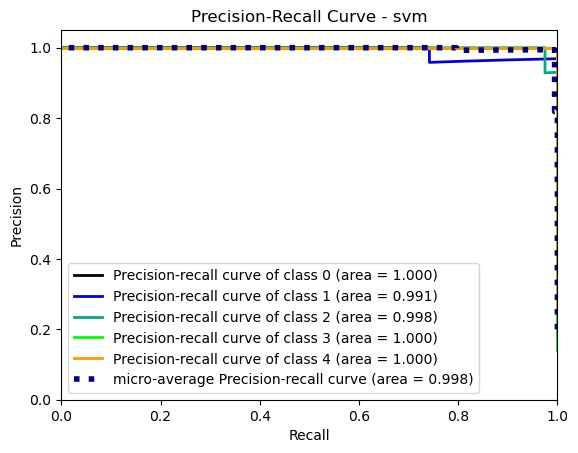

In [25]:
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - svm')
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7), 'gamma': np.logspace(-3, 3, 7)}

grid = GridSearchCV(SVC(kernel='rbf',probability=True), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best hyperparameters:  {'C': 10.0, 'gamma': 0.1}
Best score:  0.9929078014184398


In [27]:
y_pred = grid.predict(X_test)
y_probas = grid.predict_proba(X_test)

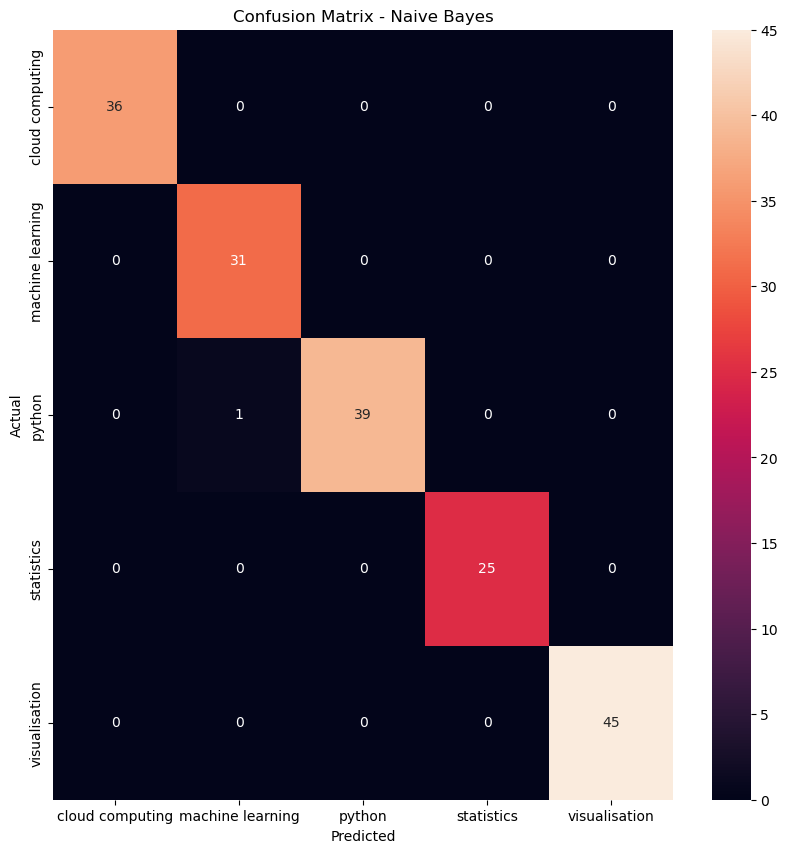

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.98        31
           2       1.00      0.97      0.99        40
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        45

    accuracy                           0.99       177
   macro avg       0.99      0.99      0.99       177
weighted avg       0.99      0.99      0.99       177



In [28]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)


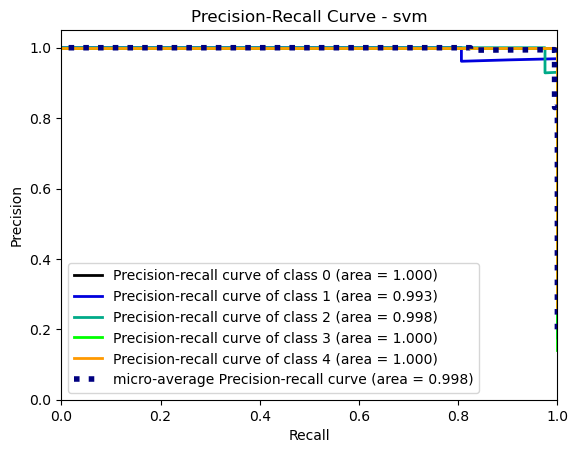

In [29]:
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - svm')
plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_tfidf, labels, test_size=0.2, random_state=75)
rf = RandomForestClassifier(n_estimators=10, random_state=75)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=75)

In [48]:
y_pred = rf.predict(X_test)
y_probas = rf.predict_proba(X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Compute classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy: 0.9774011299435028
Confusion matrix:
[[28  1  0  0  0]
 [ 0 31  0  0  0]
 [ 0  0 39  0  0]
 [ 0  0  0 35  0]
 [ 2  0  1  0 40]]
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.97      1.00      0.98        31
           2       0.97      1.00      0.99        39
           3       1.00      1.00      1.00        35
           4       1.00      0.93      0.96        43

    accuracy                           0.98       177
   macro avg       0.98      0.98      0.98       177
weighted avg       0.98      0.98      0.98       177



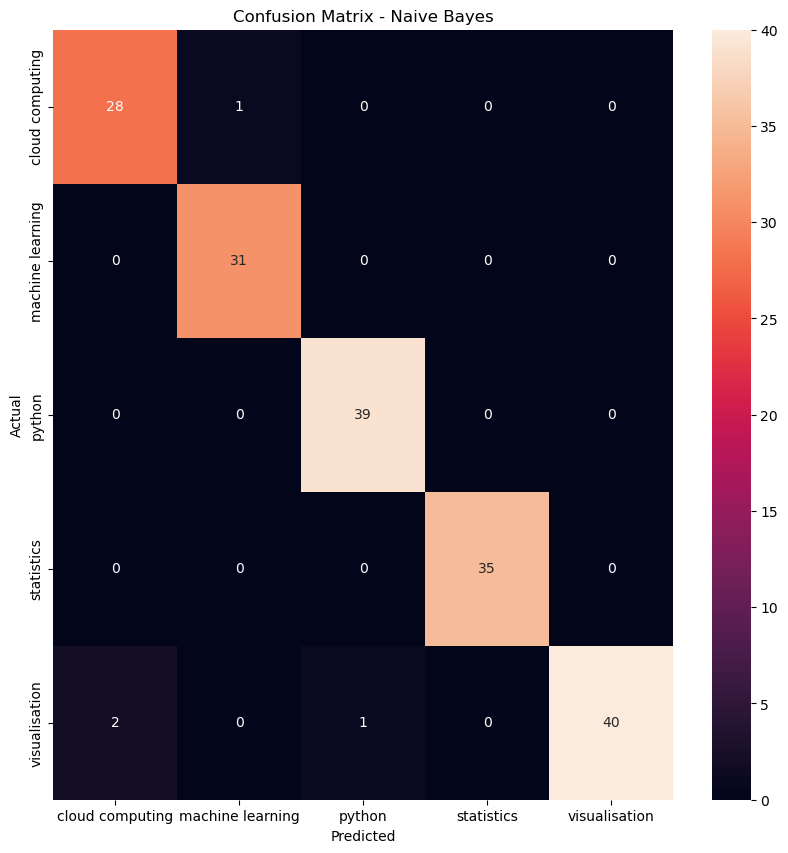

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.97      1.00      0.98        31
           2       0.97      1.00      0.99        39
           3       1.00      1.00      1.00        35
           4       1.00      0.93      0.96        43

    accuracy                           0.98       177
   macro avg       0.98      0.98      0.98       177
weighted avg       0.98      0.98      0.98       177



In [50]:
 #Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)


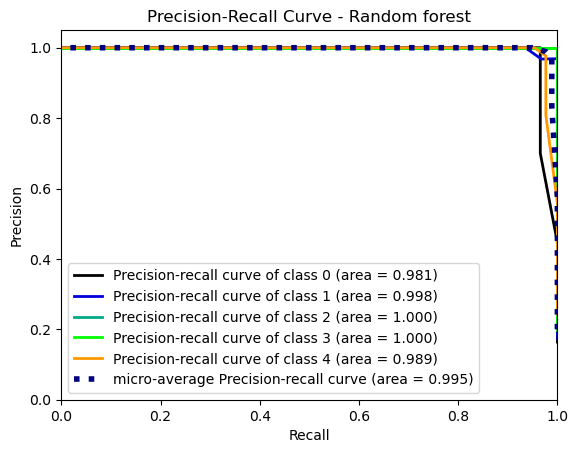

In [51]:
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - Random forest')
plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, labels, test_size=0.2, random_state=75)
rf = RandomForestClassifier(n_estimators=90, random_state=65)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=90, random_state=65)

In [53]:
y_pred = rf.predict(X_test)
y_probas = rf.predict_proba(X_test)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Compute classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy: 0.9943502824858758
Confusion matrix:
[[29  0  0  0  0]
 [ 0 31  0  0  0]
 [ 0  0 39  0  0]
 [ 0  0  0 35  0]
 [ 0  1  0  0 42]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        35
           4       1.00      0.98      0.99        43

    accuracy                           0.99       177
   macro avg       0.99      1.00      0.99       177
weighted avg       0.99      0.99      0.99       177



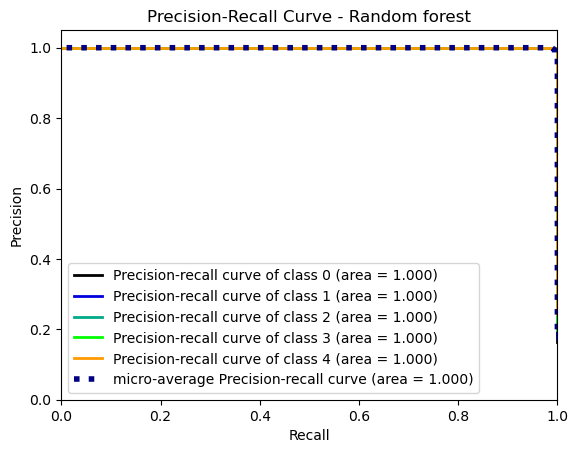

In [58]:
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - Random forest')
plt.show()

In [43]:













from sklearn.model_selection import cross_val_score

# Instantiate a random forest classifier with n_estimators = 100
rf = RandomForestClassifier(n_estimators=100)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean of the cross-validation scores
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.98591549 1.         1.         1.         1.         0.98571429
 1.         1.         1.         1.        ]
Mean CV accuracy: 0.9971629778672032
